# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 178 (delta 79), reused 143 (delta 44), pack-reused 0
Receiving objects: 100% (178/178), 34.11 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

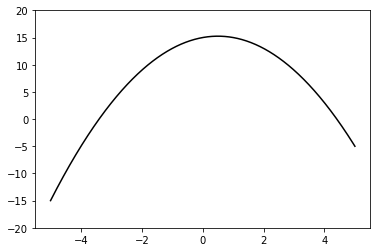

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

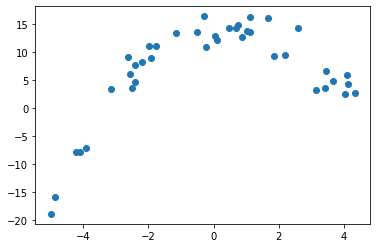

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    trans = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X = trans.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y, test_size=.2, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [11]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)
model = LinearRegression(normalize=True).fit(X_train,y_train)

model_no_reg = model


Training error (rmse): 0.356788169073266
Testing error (rmse): 4012607744.6244097


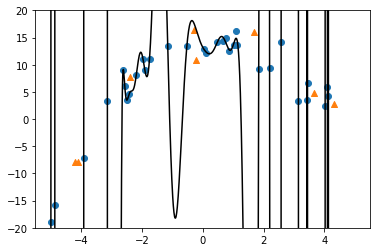

Polynomial coefficients
[13.211416041294548, -10.3074878157032, 22.755133890731628, -18.506058793622064, 9.265920236421874, 413.5975610155903, -550.858521769193, -922.4895387108564, 1162.0937691572865, 963.7382126352123, -1025.2308499584665, -589.4888568874775, 481.0261759455312, 220.99202513918195, -131.56842694611862, -50.67772355772799, 21.62740139961197, 6.864213763445388, -2.0800955560294927, -0.4891468307810222, 0.10018840916864137, 0.010399902944668688, -0.0005457921009492943, 0.0005614346270966191, -0.00011922871408458373, -1.0626854090175323e-05, -4.882751200471901e-07, -1.0078102139539948e-06, 1.4688568339884817e-07, -1.956533726129056e-08, 6.021758254336949e-09, 4.88506450785054e-10, 7.03608745893588e-11, 4.786217273302908e-11, -4.832982378231774e-12, 1.9162511187927574e-12, -3.8785737905879177e-13, 5.118004030923846e-14, -1.7660552437340648e-14, 8.618004824614322e-16, -6.16562220481481e-16, -2.4083734981056254e-19, -1.7146686403060322e-17, -6.971359938147363e-19, -3.3492310

In [12]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [13]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg =  linear_model.Lasso(alpha=.1,normalize=True).fit(X_train,y_train)

Training error (rmse): 2.060521241065587
Testing error (rmse): 2.3244562338762353


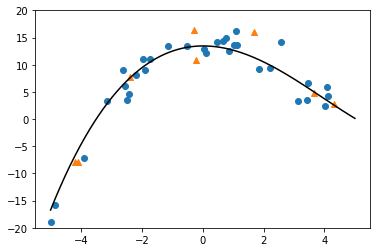

Polynomial coefficients
[13.457307340671427, 0.027220220844758128, -0.8703878393680787, 0.05943086373564748, -0.0, 0.000277649108388786, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0,

In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=.1,normalize=True).fit(X_train,y_train)

Training error (rmse): 2.041767885562139
Testing error (rmse): 2.0994601821629875


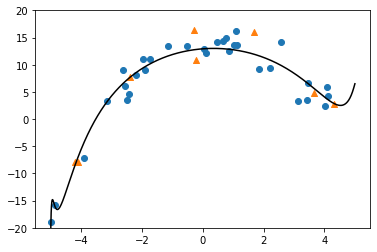

Polynomial coefficients
[12.925586427640066, 0.4249079611508333, -0.6010293830185508, 0.018713565705351803, -0.012505065638264671, 0.0008853575173436271, -0.00021469900525205893, 3.389335819807357e-05, -2.583246888186686e-06, 1.0995866575405695e-06, 1.280713693809529e-08, 3.14199164699757e-08, 2.579473902481872e-09, 7.959802936255492e-10, 1.3515434461102213e-10, 1.7045505275554146e-11, 5.728990483168685e-12, 2.406413726057388e-13, 2.249828479776646e-13, -2.9227860381826568e-15, 8.55633247768433e-15, -4.609067860396828e-16, 3.211272760456644e-16, -2.7526185955212497e-17, 1.1999173754632936e-17, -1.3301895895846884e-18, 4.482350327947647e-19, -5.856454337362813e-20, 1.6768532412182547e-20, -2.4501377159019183e-21, 6.285324157439761e-22, -9.934248771973863e-23, 2.3601207471282092e-23, -3.945456078503685e-24, 8.873953899042998e-25, -1.54458108583039e-25, 3.339135867687141e-26, -5.983878604318479e-27, 1.2567282266519874e-27, -2.299952118238167e-28, 4.7284041765144936e-29, -8.785171332784143

In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [17]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,1.681532,16.070558,-1.841189e+02,11.328318,11.937944
1,-2.395077,7.723543,4.900290e+00,7.560817,7.659943
2,3.653099,4.833669,-4.497281e+05,5.019259,5.659297
3,-4.195542,-7.812998,-1.087032e+10,-6.728009,-8.489397
4,-0.234030,10.927272,1.679760e+01,13.402504,12.792948
5,-0.278573,16.365057,1.750341e+01,13.380895,12.760096
6,-4.101756,-7.821475,-3.204828e+09,-5.721765,-7.074080
7,4.328338,2.748648,6.110264e+08,2.509837,2.819741
